# ML Lab Work-2
WINE CLASSIFICATION USING NEURAL NETWORK

Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from kerastuner import RandomSearch
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import visualkeras
from keras.utils import plot_model
import pydotplus

C:\Users\ingzh\AppData\Local\Temp\ipykernel_1652\862184067.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


# Data Preparation

In [2]:
#Load dataset
df1 = pd.read_csv("D:\ingzhen\OneDrive - Universiti Malaya\y1s2\WIA1006\Lab Work 2\Dataset\winequality-red.csv", delimiter = ";")
df2 = pd.read_csv("D:\ingzhen\OneDrive - Universiti Malaya\y1s2\WIA1006\Lab Work 2\Dataset\winequality-white.csv", delimiter = ";")

df1['type'] = 'red'
df2['type'] = 'white'

# Merge the datasets vertically
merged_df = pd.concat([df1, df2], axis=0)

# Save the merged dataset
merged_df.to_csv('merged_winequality.csv', index=False)

print(merged_df.head())

print(merged_df.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

In [3]:
num_na_rows = merged_df.isnull().sum(axis=1).astype(bool).sum()
total_rows = merged_df.shape[0]

print('Number of N/A rows: {}'.format(num_na_rows))
print('Number of total rows: {}'.format(total_rows))

#remove N/A values
merged_df.dropna() 
print('Number of records after removing N/A values: {}'.format(merged_df.shape[0]))

Number of N/A rows: 0
Number of total rows: 6497
Number of records after removing N/A values: 6497


In [4]:
merged_df['type'] = merged_df['type'].map({'red': 1, 'white': 2})
print(merged_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2 

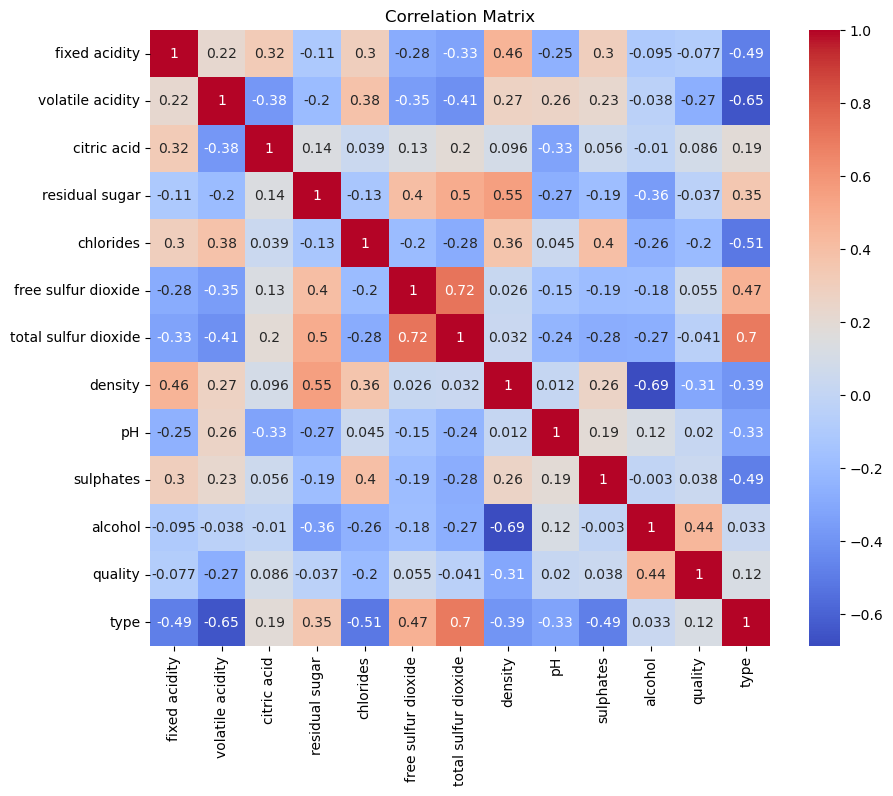

fixed acidity          -0.486740
volatile acidity       -0.653036
citric acid             0.187397
residual sugar          0.348821
chlorides              -0.512678
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
density                -0.390645
pH                     -0.329129
sulphates              -0.487218
alcohol                 0.032970
quality                 0.119323
type                    1.000000
Name: type, dtype: float64


In [5]:
# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Extract the correlation coefficients for a specific variable
correlation_with_target = corr_matrix['type']

# Print the correlation coefficients with the target variable
print(correlation_with_target)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.142473          2.188833     2.192833        0.744778   0.569958   
1          0.451036          3.282235     2.192833        0.597640   1.197975   
2          0.451036          2.553300     1.917553        0.660699   1.026697   
3          3.073817          0.362438     1.661085        0.744778   0.541412   
4          0.142473          2.188833     2.192833        0.744778   0.569958   
...             ...               ...          ...             ...        ...   
4893       0.783214          0.787650     0.197054        0.807837   0.486252   
4894       0.474652          0.119460     0.284686        0.537425   0.257883   
4895       0.551792          0.605417     0.885253        0.891916   0.429160   
4896       1.323198          0.301694     0.128234        0.912936   0.971538   
4897       0.937495          0.787650     0.422326        0.975995   1.028631   

      free sulfur dioxide  

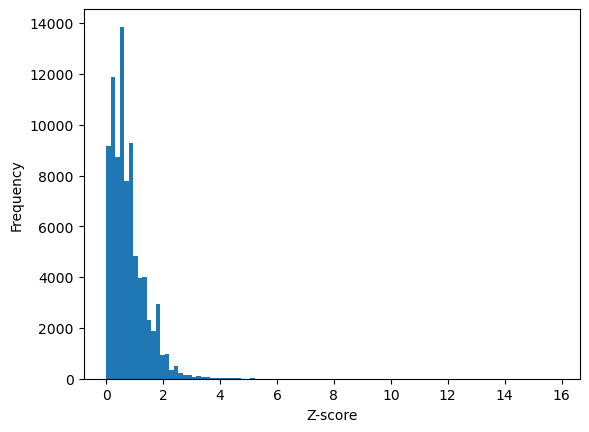

Number of rows after removing outliers using 2.5 std dev: 5529
Number of rows after removing outliers using 3 std dev: 0
Number of rows that are within std dev 2.5 to 3: 460
5529


In [6]:
# Calculate the z-scores for each data point
# z_scores = np.abs((df - df.mean()) / df.std())
z_scores = np.abs(stats.zscore(merged_df))
print(z_scores)

# Plot the distribution of the z-scores to understand the outliers lied at in the distribution
plt.hist(z_scores.values.flatten(), bins=100)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.show()

# Choose a threshold based on the distribution of the z-scores
min_threshold = 2.5
max_threshold = 3.0
print('Number of rows after removing outliers using 2.5 std dev: {}'.format(merged_df[(z_scores < min_threshold).all(axis=1)].shape[0]))
print('Number of rows after removing outliers using 3 std dev: {}'.format(merged_df[(z_scores > max_threshold).all(axis=1)].shape[0]))
print('Number of rows that are within std dev 2.5 to 3: {}'.format(abs(merged_df[(z_scores < min_threshold).all(axis=1)].shape[0]- merged_df[(z_scores < max_threshold).all(axis=1)].shape[0])))

merged_df = merged_df[(z_scores < min_threshold).all(axis=1)]
print(merged_df.shape[0])

In [7]:
# create a MinMaxScaler object
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(merged_df), columns= merged_df.columns)
df_normalized.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.500000,0.925373,0.000000,0.077844,0.492308,0.136986,0.112,0.714489,0.8625,0.500000,0.20,0.25,0.0
1,0.500000,0.925373,0.000000,0.077844,0.492308,0.136986,0.112,0.714489,0.8625,0.500000,0.20,0.25,0.0
2,0.500000,0.865672,0.000000,0.071856,0.484615,0.164384,0.136,0.714489,0.8625,0.500000,0.20,0.25,0.0
3,0.583333,0.776119,0.088235,0.059880,0.438462,0.191781,0.212,0.615057,0.6000,0.352941,0.20,0.25,0.0
4,0.483333,0.850746,0.000000,0.035928,0.407692,0.191781,0.060,0.487216,0.7125,0.367647,0.32,0.75,0.0
5,0.566667,0.746269,0.029412,0.083832,0.469231,0.109589,0.048,0.643466,0.6750,0.514706,0.22,0.75,0.0
6,0.516667,0.626866,0.529412,0.329341,0.453846,0.219178,0.384,0.714489,0.6625,0.852941,0.42,0.25,0.0
7,0.383333,0.746269,0.117647,0.071856,0.653846,0.191781,0.236,0.579545,0.5750,0.470588,0.16,0.25,0.0
8,0.516667,0.626866,0.529412,0.329341,0.453846,0.219178,0.384,0.714489,0.6625,0.852941,0.42,0.25,0.0
9,0.200000,0.798507,0.000000,0.059880,0.592308,0.205479,0.212,0.465909,0.9500,0.441176,0.30,0.25,0.0


In [8]:
X = df_normalized.drop('type', axis=1)
y = df_normalized['type']


# Split the dataset into training, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Model Development
Design 5 different neural network architectures to be trained

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


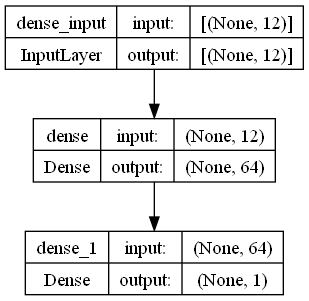

In [9]:
# Model 1
# Two dense layers (one hidden layer)
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()
plot_model(model1, to_file='model_architecture1.png', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                832       
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


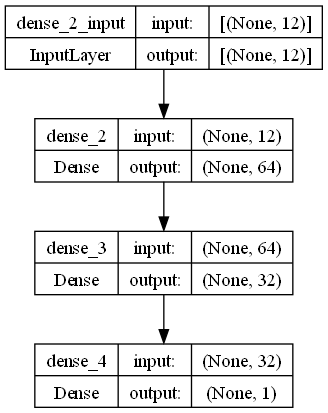

In [10]:
# Model 2
# Three dense layers (two hidden layers)
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()
plot_model(model2, to_file='model_architecture2.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                832       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,105
Trainable params: 7,105
Non-trainable params: 0
_________________________________________________________________


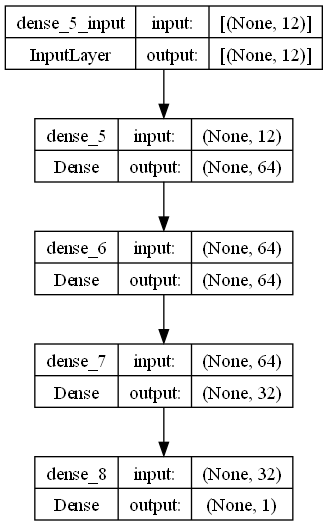

In [11]:
# Model 3
# Four dense layers (three hidden layers)
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()
plot_model(model3, to_file='model_architecture3.png', show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


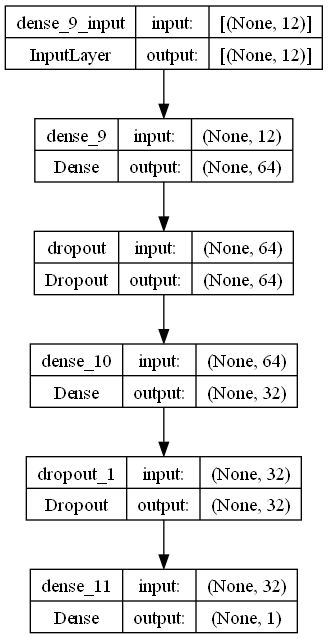

In [12]:
# Model 4
# Three dense layers with dropout
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dropout(0.5))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()
plot_model(model4, to_file='model_architecture4.png', show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)               

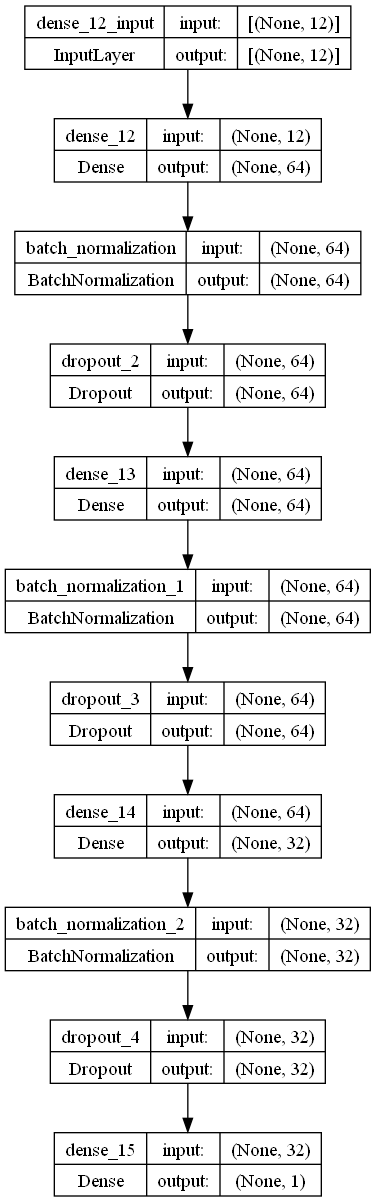

In [13]:
# Model 5
# Four dense layers with dropout and batch normalisation
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(32, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

model5.summary()
plot_model(model5, to_file='model_architecture5.png', show_shapes=True)

In [14]:
models = [model1, model2, model3, model4, model5]

Training model 1
Epoch 1/100
121/121 [==============================] - 3s 9ms/step - loss: 0.0211 - accuracy: 0.9956 - val_loss: 0.0106 - val_accuracy: 0.9952
Epoch 2/100
121/121 [==============================] - 1s 5ms/step - loss: 0.0204 - accuracy: 0.9961 - val_loss: 0.0102 - val_accuracy: 0.9964
Epoch 3/100
121/121 [==============================] - 1s 4ms/step - loss: 0.0201 - accuracy: 0.9964 - val_loss: 0.0101 - val_accuracy: 0.9964
Epoch 4/100
121/121 [==============================] - 1s 5ms/step - loss: 0.0197 - accuracy: 0.9964 - val_loss: 0.0100 - val_accuracy: 0.9964
Epoch 5/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9969 - val_loss: 0.0097 - val_accuracy: 0.9964
Epoch 6/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9961 - val_loss: 0.0101 - val_accuracy: 0.9988
Epoch 6: early stopping


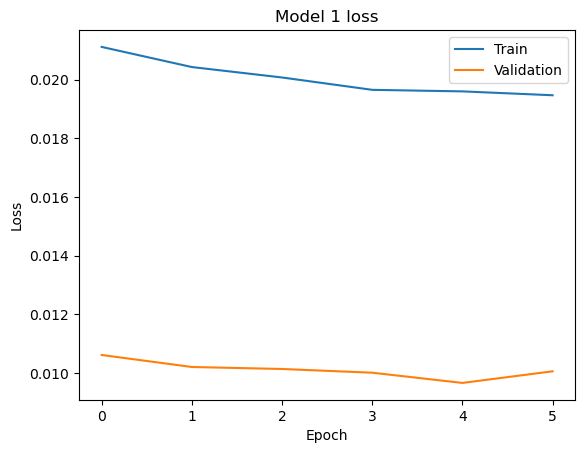

Training model 2
Epoch 1/100
121/121 [==============================] - 3s 8ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0063 - val_accuracy: 0.9988
Epoch 2/100
121/121 [==============================] - 1s 5ms/step - loss: 0.0147 - accuracy: 0.9972 - val_loss: 0.0080 - val_accuracy: 0.9976
Epoch 2: early stopping


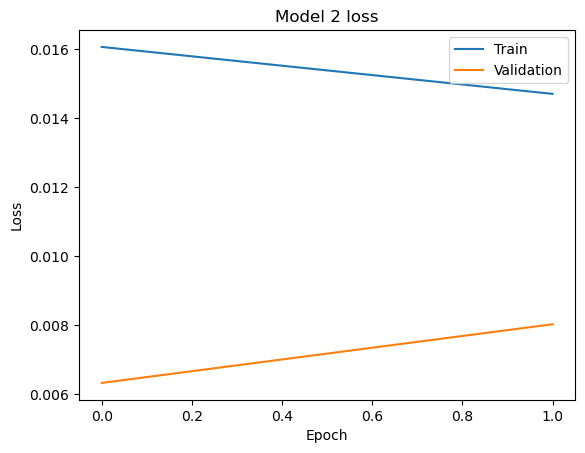

Training model 3
Epoch 1/100
121/121 [==============================] - 3s 7ms/step - loss: 0.0178 - accuracy: 0.9964 - val_loss: 0.0060 - val_accuracy: 0.9988
Epoch 2/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9964 - val_loss: 0.0057 - val_accuracy: 0.9976
Epoch 3/100
121/121 [==============================] - 1s 4ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.0116 - val_accuracy: 0.9976
Epoch 3: early stopping


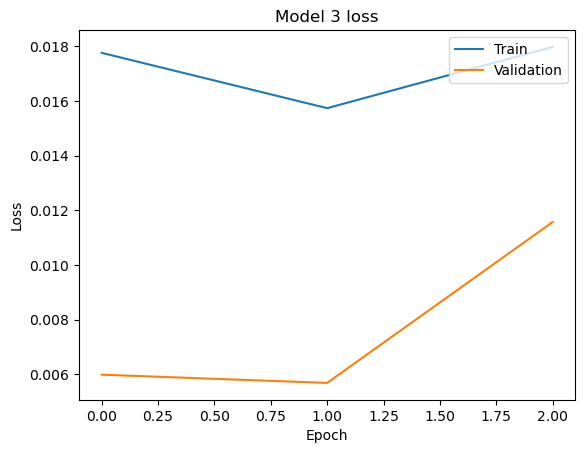

Training model 4
Epoch 1/100
121/121 [==============================] - 2s 7ms/step - loss: 0.0308 - accuracy: 0.9938 - val_loss: 0.0086 - val_accuracy: 0.9940
Epoch 2/100
121/121 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9938 - val_loss: 0.0089 - val_accuracy: 0.9976
Epoch 2: early stopping


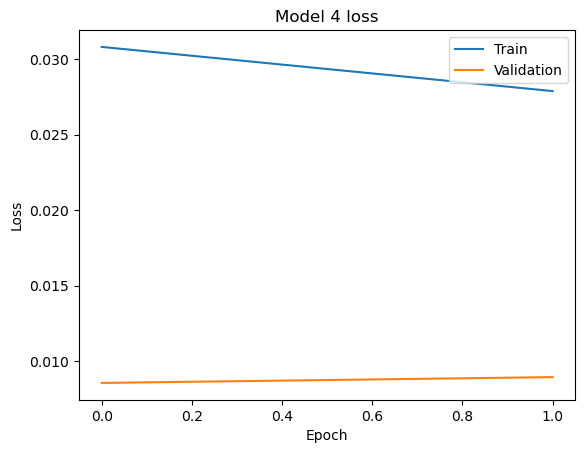

Training model 5
Epoch 1/100
121/121 [==============================] - 6s 10ms/step - loss: 0.0390 - accuracy: 0.9886 - val_loss: 0.0037 - val_accuracy: 0.9988
Epoch 2/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0423 - accuracy: 0.9904 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 2: early stopping


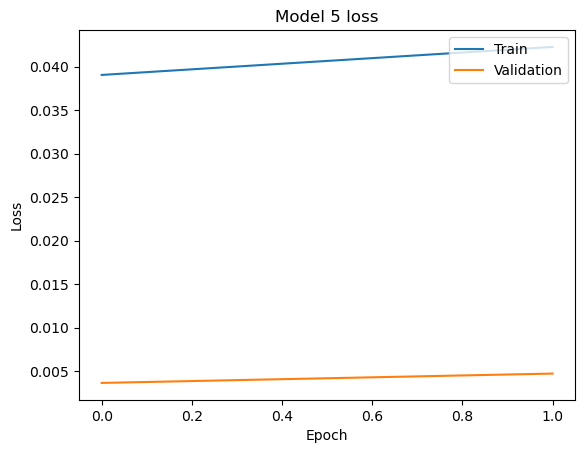

The best model is Model 1 with validation accuracy: 0.9987937211990356


In [22]:
models = [model1, model2, model3, model4, model5]
best_validation_accuracy = 0.0

# Compile and train models
for i, model in enumerate(models, 1):
    print(f'Training model {i}')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es])
    
    # Retrieve the validation accuracy from history
    val_accuracy = history.history['val_accuracy'][-1]
    
    # Check if the current model has the highest validation accuracy
    if val_accuracy > best_validation_accuracy:
        best_model = model
        best_validation_accuracy = val_accuracy
        best_model_index = i

    # Plot training/validation loss
    plt.figure(i)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {i} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()



Choose the best model 
* Look for models that achieve low training and validation loss, indicating good generalization and avoidance of overfitting.
* Check for convergence of the loss curves. Ideally, both training and validation loss should stabilize or decrease steadily as training progresses.

In [33]:
# After training all models, the best model will be stored in 'best_model' variable
print(f'The best model is Model {best_model_index} with validation accuracy: {best_validation_accuracy}')

The best model is Model 1 with validation accuracy: 0.9987937211990356


# Model Tuning

In [23]:
import keras_tuner as kt
from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','sgd','rmsprop']),
        loss='binary_crossentropy', 
        metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [24]:
# Retrieve all hyperparameters from the tuner
hyperparameters = tuner.get_best_hyperparameters(num_trials=10)

# Create a list to store the hyperparameter results
results = []

# Create a variable to store the best validation accuracy
best_val_accuracy = 0.0

# Create variables to store the best hyperparameter values
best_units = None
best_optimizer = None

# Iterate over the hyperparameters
for trial, params in enumerate(hyperparameters):
    # Extract the chosen hyperparameters
    units = params.get('units')
    optimizer = params.get('optimizer')
    
    # Build the model with the current hyperparameters
    model = build_model(params)
    
    # Train the model
    model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
    
    # Evaluate the model on the validation data
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    
    # Add the hyperparameter results to the list
    results.append({'Trial': trial+1, 'Units': units, 'Optimizer': optimizer, 'Val Accuracy': val_accuracy})
    
    # Check if the current configuration has the best validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_units = units
        best_optimizer = optimizer

# Convert the list of dictionaries into a DataFrame
results_df = pd.DataFrame(results)

# Print the hyperparameter results table
print(results_df)

# Print the best hyperparameter configuration
print("\nBest Hyperparameter Configuration")
print(f"Units: {best_units}")
print(f"Optimizer: {best_optimizer}")

Epoch 1/5
121/121 [==============================] - 3s 10ms/step - loss: 0.1288 - accuracy: 0.9499 - val_loss: 0.0405 - val_accuracy: 0.9855
Epoch 2/5
121/121 [==============================] - 1s 8ms/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0164 - val_accuracy: 0.9952
Epoch 3/5
121/121 [==============================] - 1s 7ms/step - loss: 0.0297 - accuracy: 0.9930 - val_loss: 0.0139 - val_accuracy: 0.9976
Epoch 4/5
121/121 [==============================] - 1s 7ms/step - loss: 0.0282 - accuracy: 0.9928 - val_loss: 0.0190 - val_accuracy: 0.9952
Epoch 5/5
26/26 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9964
Epoch 1/5
121/121 [==============================] - 3s 7ms/step - loss: 0.1294 - accuracy: 0.9512 - val_loss: 0.0261 - val_accuracy: 0.9916
Epoch 2/5
121/121 [==============================] - 1s 4ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0168 - val_accuracy: 0.9940
Epoch 3/5
121/121 [==============================] - 1s 

# Model Evaluation

In [25]:
# Fetch the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [26]:
# Predict the test set results
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

26/26 [==============================] - 0s 4ms/step


In [27]:
# Compute and print the performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[173   3]
 [  0 654]]


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       176
         1.0       1.00      1.00      1.00       654

    accuracy                           1.00       830
   macro avg       1.00      0.99      0.99       830
weighted avg       1.00      1.00      1.00       830



Accuracy Score:
0.9963855421686747


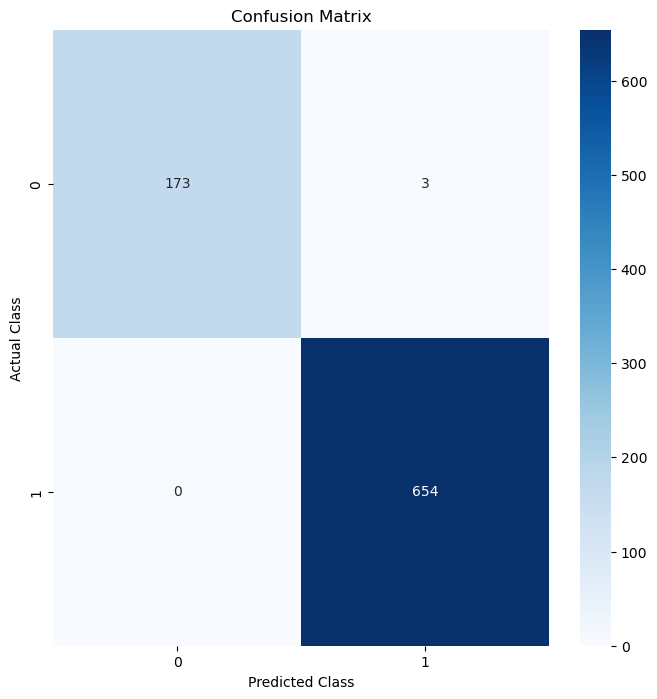

In [28]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

In [29]:
# Calculate the probabilities of the predictions
y_test_prob = best_model.predict(X_test)

26/26 [==============================] - 0s 4ms/step


In [30]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [31]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_test_prob)

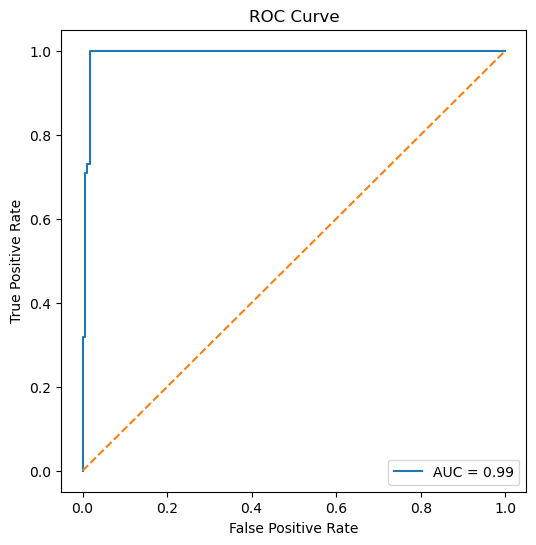

In [32]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# Report Observation and Discuss the Results

Based on the confusion matrix, we can draw the following conclusions:

* The model accurately predicts the negative class (0) with a high true negative count of 173. This suggests that the model is effective in correctly identifying instances of the negative class.
* The false positive count is very low (3), indicating that the model rarely misclassifies negative instances as positive.
* The false negative count is also relatively low (0), suggesting that the model has a good ability to detect positive instances correctly.
* The true positive count is high (654), demonstrating the model's capability to accurately classify positive instances.
* Overall, the model appears to perform well based on the provided confusion matrix, exhibiting high true negative and true positive rates and low false positive and false negative counts.

Based on the classification report:

* Precision: The precision for class 0 (negative) is 1.00, indicating that 100% of the instances predicted as class 0 are correct. For class 1 (positive), the precision is also 1.00, indicating that 100% of the instances predicted as class 1 are correct. The high precision values for both classes indicate that the model has a low rate of false positives, meaning that when it predicts a class label, it is usually correct.
* Recall: The recall for class 0 is 0.98, indicating that 98% of the actual class 0 instances are correctly predicted. For class 1, the recall is 1.00, indicating that 100% of the actual class 1 instances are correctly predicted. The high recall values for both classes indicate that the model has a low rate of false negatives, meaning that it can effectively capture most of the instances belonging to each class.
* F1-score: The F1-score for class 0 is 0.99, which is the harmonic mean of precision and recall. For class 1, the F1-score is 1.00. The F1-scores for both classes are high, indicating a good balance between precision and recall.
* Support: There are 176 instances of class 0 and 654 instances of class 1 in the test set.
* Accuracy: The accuracy of the model is 0.9964, meaning that it correctly predicts the class labels for 99.64% of the instances in the test set.
* Macro Average: The macro-averaged precision, recall, and F1-score are all 1.00. The macro-average provides a summary of the model's performance across both classes, considering an equal weighting for each class.
* Weighted Average: The weighted-averaged precision, recall, and F1-score are all 1.00. The weighted-average accounts for the varying class distributions and provides an overall performance metric.

Based on the ROC (Receiver Operating Characteristic) curve, we can draw the following conclusions:
* The AUC (Area Under the Curve) score is calculated by measuring the area under the ROC curve. The AUC score value of 1 indicates a better-performing model in terms of its ability to distinguish between the positive and negative classes.
* When the false postitve rate (FPR) is 0.0, the true positive rate(TPR) increases from 0.0 to 1.0 inidcates that when the FPR is 0.0, the model correctly classifies all positive instances (true positives) without making any false positive predictions. 
* As the FPR gradually increases, the model still maintains a TPR of 1, indicating that it continues to correctly identify all positive instances. Thus, the model achieves a perfect true positive rate without any false positives up to that point.